https://www.kaggle.com/hely333/eda-regression 

In [1]:
 from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#In[1]

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/21-1/insurance/insurance.csv')

In [4]:
#In[2]

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#In[3]

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#In[4]

from sklearn.preprocessing import LabelEncoder

#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

#smoker or not
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)

#region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [7]:
#In[5]

data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

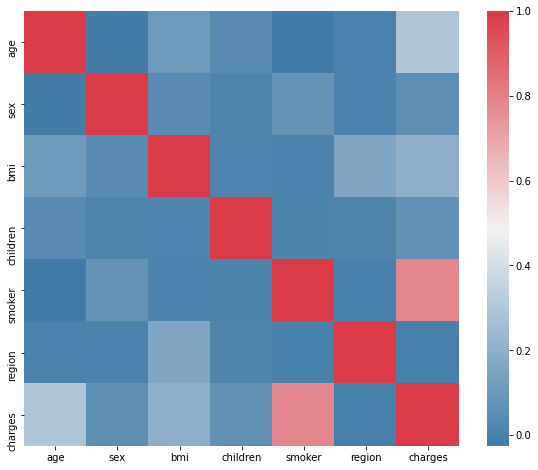

In [8]:
#In[6]

f, ax = plt.subplots(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),square=True, ax=ax)

In [9]:
#In[7]

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB")
hist, edges = np.histogram(data.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(gridplot([p],ncols=2, plot_width=400, plot_height=400, toolbar_location=None))

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

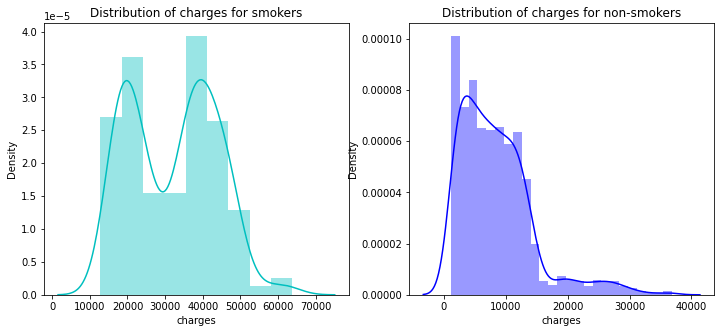

In [10]:
#In[8]

f = plt.figure(figsize=(12,5))

ax = f.add_subplot(121)
sns.distplot(data[(data.smoker==1)]["charges"], color='c', ax=ax)
ax.set_title('Distribution of charges for smokers')

ax = f.add_subplot(122)
sns.distplot(data[(data.smoker==0)]['charges'], color='b', ax=ax)
ax.set_title('Distribution of charges for non-smokers')

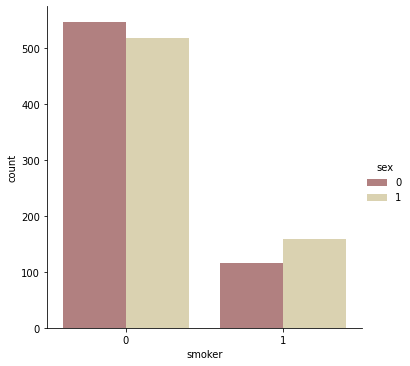

In [11]:
#In[9]

sns.catplot(x='smoker', kind='count', hue='sex', palette='pink', data=data)

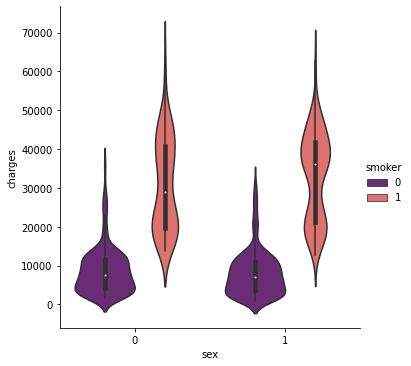

In [12]:
#In[10]

sns.catplot(x='sex', y='charges', hue='smoker', kind='violin', data=data, palette='magma')

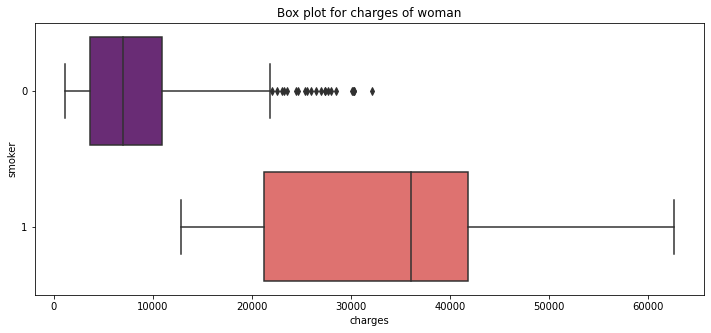

In [13]:
#In[11]

plt.figure(figsize=(12,5))
plt.title("Box plot for charges of woman")
sns.boxplot(y="smoker", x="charges", data=data[(data.sex==1)], orient="h", palette='magma')

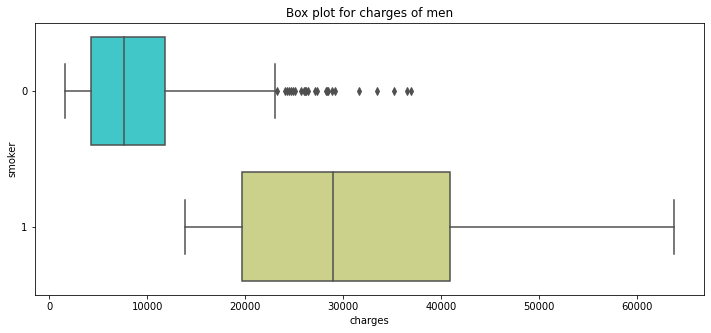

In [14]:
#In[12]

plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data=data[(data.sex==0)], orient="h", palette="rainbow")

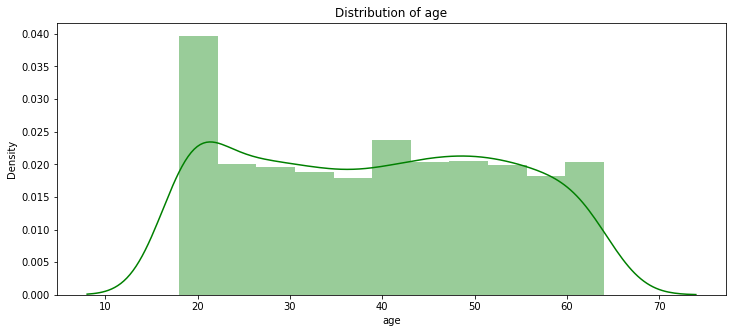

In [15]:
#In[13]

plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

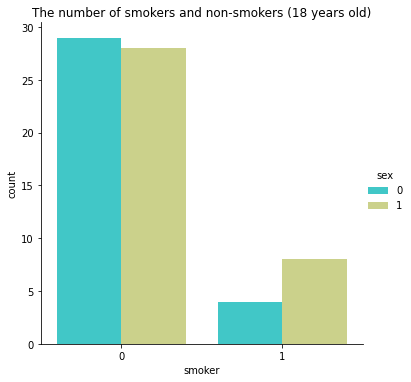

In [16]:
#In[14]

sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

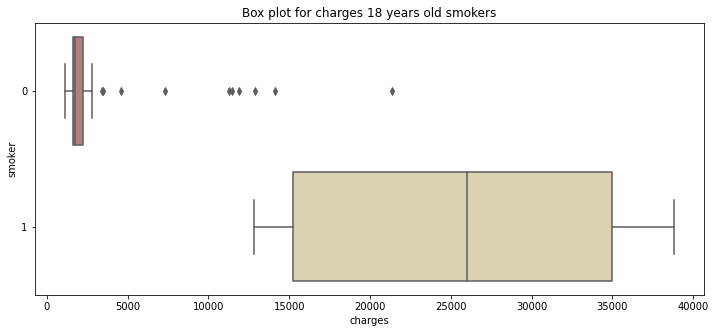

In [17]:
#In[15]

plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

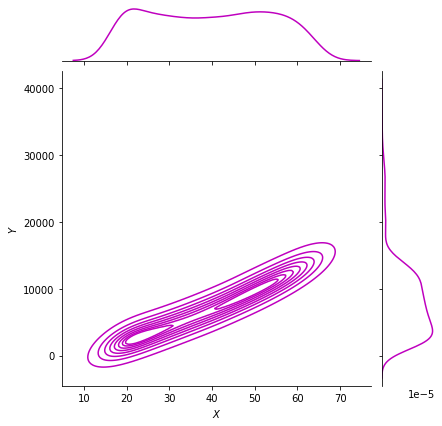

In [18]:
#In[16]

g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

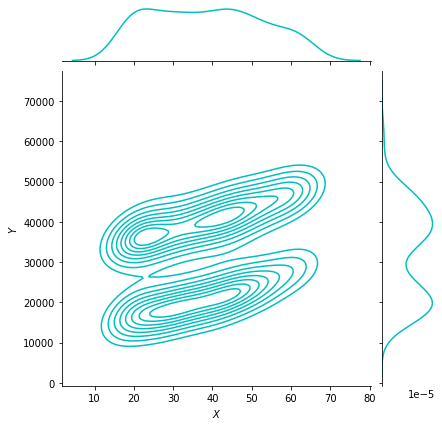

In [19]:
#In[17]

g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

In [20]:
#In[18]

#non-smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker==0)].age, y=data[(data.smoker==0)].charges, size=7, line_color='navy', fill_color='pink', fill_alpha=0.9)
show(p)


In [21]:
#In[19]
#smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker==1)].age, y=data[(data.smoker==1)].charges, size=7, line_color='navy', fill_color='red', fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non-smokers')

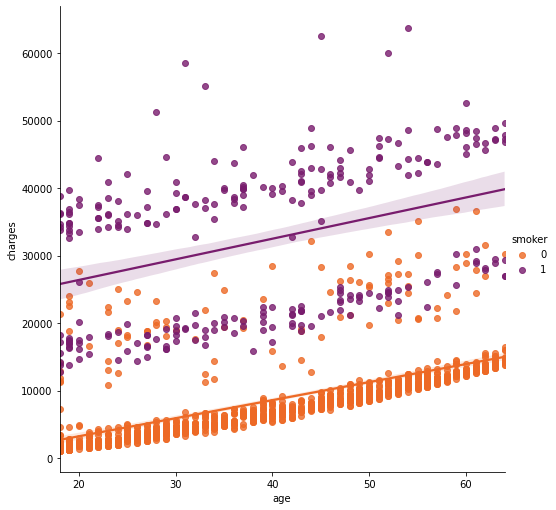

In [22]:
#In[20]

sns.lmplot(x='age', y='charges', hue='smoker', data=data, palette='inferno_r', size=7)
ax.set_title('Smokers and non-smokers')

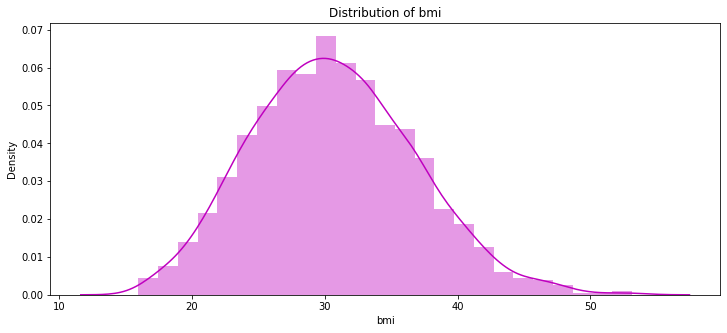

In [23]:
#In[21]

plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color='m')

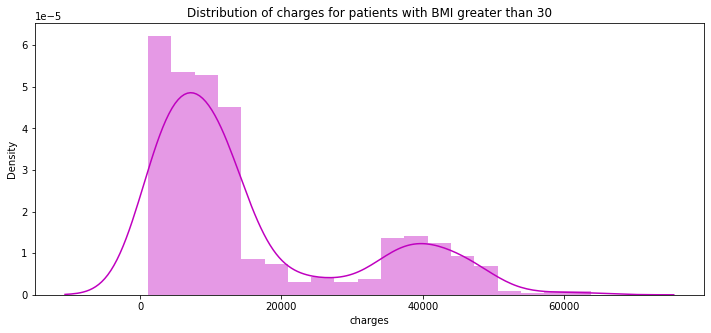

In [24]:
#In[22]

plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi>=30)]['charges'], color='m')

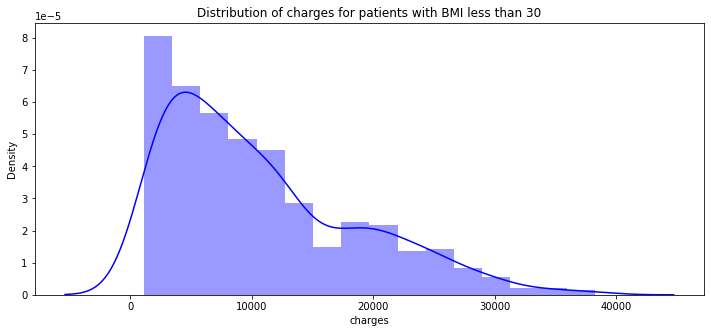

In [25]:
#In[23]

plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi<30)]['charges'], color='b')

Text(0.5, 1.0, 'Distribution of bmi and charges')

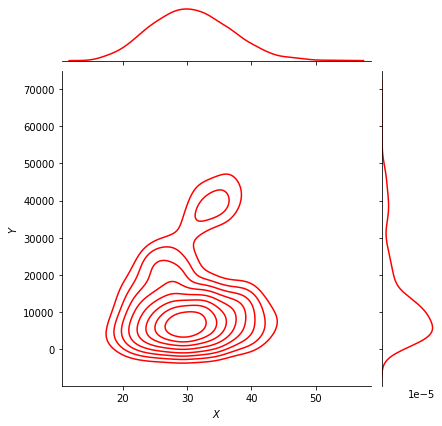

In [26]:
#In[24]

g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

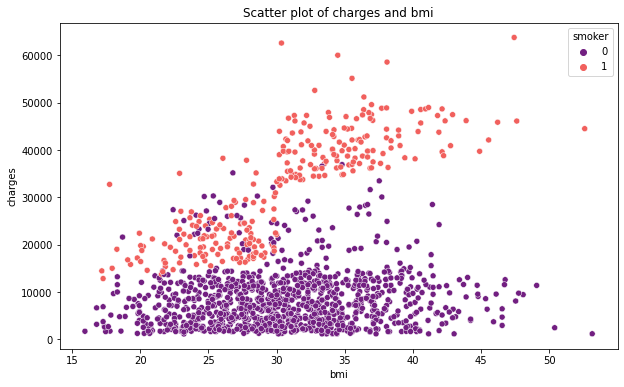

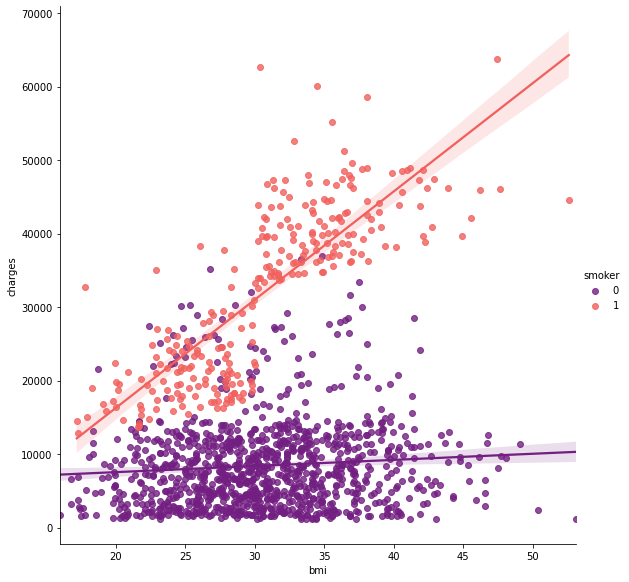

In [27]:
#In[25]

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

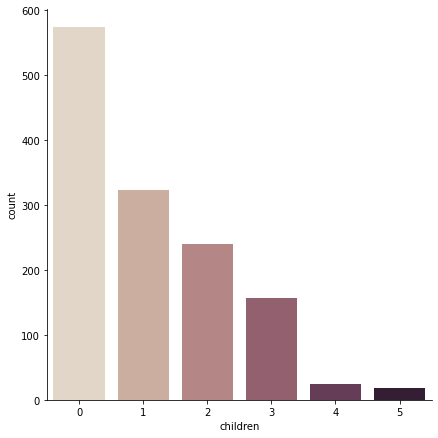

In [28]:
#In[26]

sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

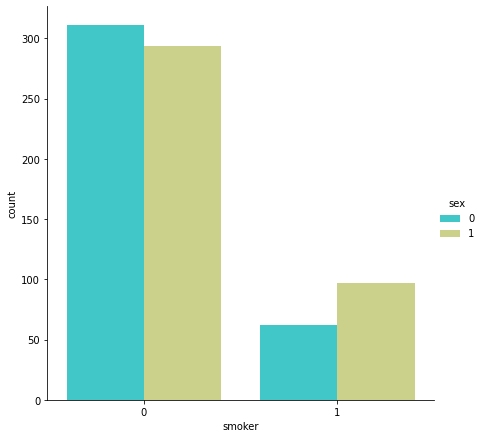

In [29]:
#In[27]

sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

In [30]:
#In[28]

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [31]:
#In[29]


x = data.drop(['charges'], axis=1)
y = data.charges

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)
lr = LinearRegression().fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test, y_test))

0.7962732059725786


In [32]:
#In[30]

X = data.drop(['charges', 'region'], axis=1)
Y = data.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(x_quad, Y, random_state=0)

plr = LinearRegression().fit(X_train, Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147228


In [33]:
#In[31]

forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train, y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data %.3f, MSE test data: %.3f'%(
    mean_squared_error(y_train, forest_train_pred),
    mean_squared_error(y_test, forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' %(
    r2_score(y_train, forest_train_pred),
    r2_score(y_test, forest_test_pred)))

MSE train data 3729086.094, MSE test data: 19933823.142
R2 train data: 0.974, R2 test data: 0.873


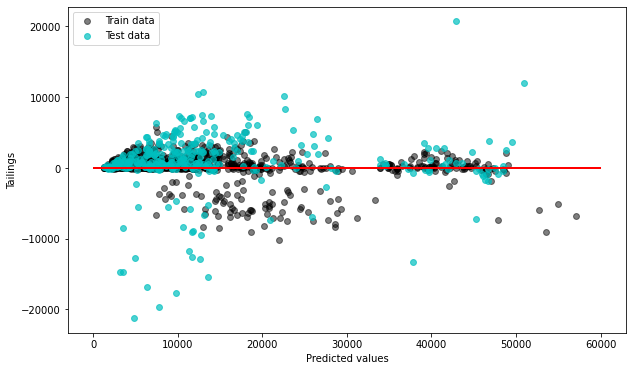

In [34]:
#In[32]

plt.figure(figsize=(10,6))
plt.scatter(forest_train_pred, forest_train_pred-y_train,
            c='black', marker='o', s=35, alpha=0.5, label='Train data')
plt.scatter(forest_test_pred, forest_test_pred-y_test, 
            c='c', marker='o', s=35, alpha=0.7, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=60000, lw=2, color='red')
plt.show()

------------발표 자료-------------------------

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

In [36]:
x = data.age
y = data.charges

In [37]:
x.head()

0    19
1    18
2    28
3    33
4    32
Name: age, dtype: int64

In [38]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [39]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, x, y, scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5교차 검증의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))


5교차 검증의 개별 Negative MSE scores: [nan nan nan nan nan]
5교차 검증의 개별 RMSE scores: [nan nan nan nan nan]
5교차 검증의 평균 RMSE: nan


In [40]:
neg_mse_scores = cross_val_score(rf, x, y, scoring='neg_mean_squared_error',cv=3)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('3교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('3교차 검증의 개별 RMSE scores:', np.round(rmse_scores,2))
print('3교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

3교차 검증의 개별 Negative MSE scores: [nan nan nan]
3교차 검증의 개별 RMSE scores: [nan nan nan]
3교차 검증의 평균 RMSE: nan


In [41]:
neg_mse_scores = cross_val_score(rf, x, y, scoring='neg_mean_squared_error',cv=7)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('7교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('7교차 검증의 갸별 RMSE scores:', np.round(rmse_scores,2))
print('7교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

7교차 검증의 개별 Negative MSE scores: [nan nan nan nan nan nan nan]
7교차 검증의 갸별 RMSE scores: [nan nan nan nan nan nan nan]
7교차 검증의 평균 RMSE: nan


In [42]:
#p327 엘라스틱넷 회귀
from sklearn.linear_model import Lasso, ElasticNet

In [43]:
X_data = data['age']
y_target = data['charges']

In [44]:
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, y_target=None, verbose=True):
  coeff_df = pd.DataFrame()
  if verbose : print('###### ', model_name, '######')
  for param in params:
    if model_name == 'Ridge': model = Ridge(alpha=param)
    elif model_name == 'Lasso' : model = Lasso(alpha=param)
    elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param,avg_rmse))
    model.fit(X_data_n, y_target)
    coeff = pd.Series(data=model.coef_, index=X_data.columns)
    colname = 'alpha:'+str(param)
    coeff_df[colname] = coeff
  return coeff_df

In [45]:
#엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
#l1_ratio는 0.7로 고정

elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=x, y_target_n=y)

######  ElasticNet ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: nan


ValueError: ignored